In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("../data/train.csv")
data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [3]:
data.shape

(140700, 20)

In [4]:
data.dtypes

id                                         int64
Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [5]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)

In [6]:
data_train.shape

(112560, 20)

In [7]:
data_train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
33707,33707,Rohan,Male,55.0,Bangalore,Working Professional,Teacher,NaN,1.0,NaN,NaN,5.0,More than 8 hours,Unhealthy,B.Ed,No,4.0,2.0,Yes,0
133592,133592,Kunal,Male,54.0,Thane,Working Professional,Teacher,NaN,5.0,NaN,NaN,4.0,Less than 5 hours,Healthy,M.Com,No,11.0,4.0,Yes,0
113169,113169,Sai,Male,48.0,Lucknow,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,More than 8 hours,Moderate,M.Tech,No,3.0,1.0,Yes,0
42896,42896,Anand,Male,24.0,Nagpur,Working Professional,Teacher,NaN,1.0,NaN,NaN,1.0,7-8 hours,Unhealthy,B.Arch,Yes,8.0,5.0,No,0
82457,82457,Kush,Male,38.0,Meerut,Working Professional,NaN,NaN,4.0,NaN,NaN,5.0,5-6 hours,Moderate,Class 12,No,0.0,2.0,No,0


Remove id, Name from train and test data


In [8]:
data_train = data_train.drop(["id", "Name"], axis=1)
data_test = data_test.drop(["id", "Name"], axis=1)
data_train.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
33707,Male,55.0,Bangalore,Working Professional,Teacher,NaN,1.0,NaN,NaN,5.0,More than 8 hours,Unhealthy,B.Ed,No,4.0,2.0,Yes,0
133592,Male,54.0,Thane,Working Professional,Teacher,NaN,5.0,NaN,NaN,4.0,Less than 5 hours,Healthy,M.Com,No,11.0,4.0,Yes,0
113169,Male,48.0,Lucknow,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,More than 8 hours,Moderate,M.Tech,No,3.0,1.0,Yes,0
42896,Male,24.0,Nagpur,Working Professional,Teacher,NaN,1.0,NaN,NaN,1.0,7-8 hours,Unhealthy,B.Arch,Yes,8.0,5.0,No,0
82457,Male,38.0,Meerut,Working Professional,NaN,NaN,4.0,NaN,NaN,5.0,5-6 hours,Moderate,Class 12,No,0.0,2.0,No,0


In [9]:
data_train.dtypes

Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [10]:
data_train.isna().sum()

Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               29334
Academic Pressure                        90207
Work Pressure                            22370
CGPA                                     90207
Study Satisfaction                       90206
Job Satisfaction                         22363
Sleep Duration                               0
Dietary Habits                               4
Degree                                       1
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             4
Family History of Mental Illness             0
Depression                                   0
dtype: int64

### Gender


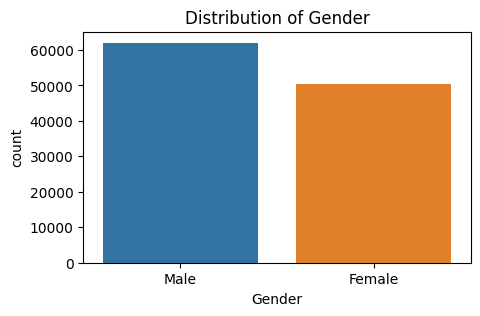

In [11]:
plt.figure(figsize=(5, 3))
sns.countplot(data_train, x="Gender")
plt.title("Distribution of Gender")
plt.show()

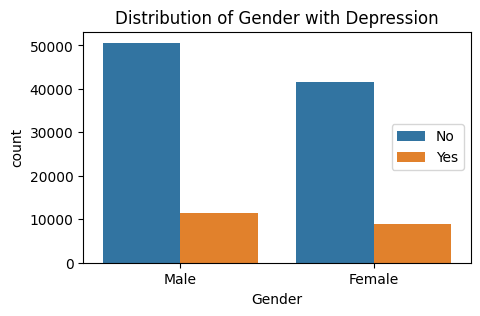

In [12]:
plt.figure(figsize=(5, 3))
sns.countplot(data_train, x="Gender", hue="Depression")
plt.title("Distribution of Gender with Depression")
plt.legend(["No", "Yes"], loc="right")
plt.show()

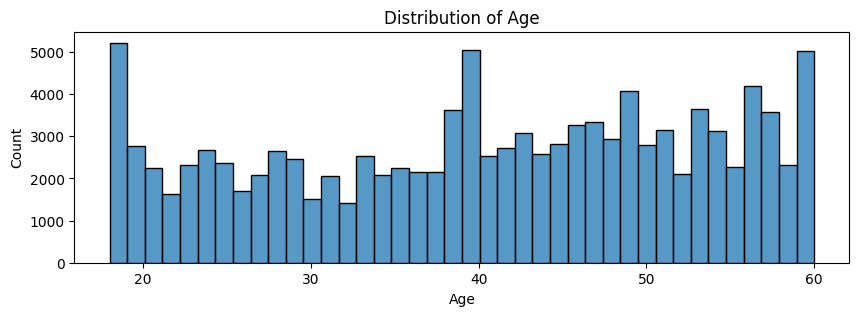

In [13]:
plt.figure(figsize=(10, 3))
sns.histplot(data_train, x="Age", bins=40)
plt.title("Distribution of Age")
plt.show()

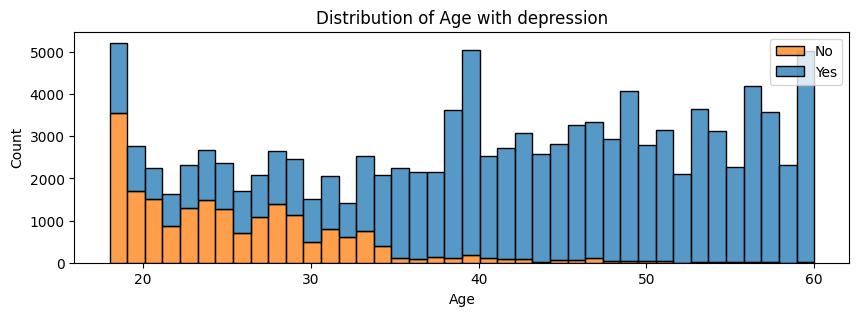

In [14]:
plt.figure(figsize=(10, 3))
sns.histplot(data_train, x="Age", hue="Depression", multiple="stack", bins=40)
plt.title("Distribution of Age with depression")
plt.legend(["No", "Yes"])
plt.show()

### City


In [15]:
city_counts = data_train["City"].value_counts()

In [16]:
city_counts

City
Kalyan         5231
Patna          4769
Vasai-Virar    4644
Kolkata        4567
Ahmedabad      4463
               ... 
Gaurav            1
Reyansh           1
Raghavendra       1
Ishanabad         1
M.Com             1
Name: count, Length: 91, dtype: int64

Last few cities looks wrong. We need to look into it.


In [17]:
city_counts[city_counts == 3].index

Index(['Mahi', 'Pratyush', 'Nandini', 'Harsha'], dtype='object', name='City')

In [18]:
city_counts[city_counts == 2].index

Index(['Vidya', 'Ayush', 'City', 'Saanvi', 'Nalini', 'MCA', 'Molkata',
       'Atharv'],
      dtype='object', name='City')

In [19]:
city_counts[city_counts == 1].index

Index(['Researcher', 'MSc', 'Jhanvi', 'Kibara', 'Harsh', 'Kagan', 'Chhavi',
       'Parth', 'Rashi', 'Shrey', 'Tolkata', 'Ithal', 'M.Tech', 'Kashk',
       'Gurgaon', 'Khaziabad', 'Vaanya', 'Unirar', 'Malyansh', 'Ivaan',
       'Krishna', 'Vaishnavi', 'Ishkarsh', 'Nalyan', 'Morena', 'Vidhi',
       'Bhavna', 'Kashish', 'No', 'Moreadhyay', 'Itheg', '3.0', 'Mira',
       'Tushar', 'Plata', 'Pooja', 'Khushi', 'Keshav', 'Aishwarya',
       'Galesabad', 'Aditya', 'Less Delhi', 'Ayansh', 'Gaurav', 'Reyansh',
       'Raghavendra', 'Ishanabad', 'M.Com'],
      dtype='object', name='City')

In [20]:
city_counts[city_counts > 3].index

Index(['Kalyan', 'Patna', 'Vasai-Virar', 'Kolkata', 'Ahmedabad', 'Meerut',
       'Ludhiana', 'Rajkot', 'Visakhapatnam', 'Pune', 'Srinagar', 'Mumbai',
       'Indore', 'Varanasi', 'Agra', 'Surat', 'Vadodara', 'Hyderabad',
       'Kanpur', 'Jaipur', 'Thane', 'Lucknow', 'Nagpur', 'Bangalore',
       'Chennai', 'Ghaziabad', 'Delhi', 'Bhopal', 'Faridabad', 'Nashik',
       'Mihir'],
      dtype='object', name='City')

- The cities that are present more than 3 times are fine.
- "Molkata", "Tolkata" must be Kolkata
- "Less Delhi" must be Delhi
- The rest can be removed


In [21]:
data_train[data_train["City"] == "Molkata"]

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
129223,Male,60.0,Molkata,Working Professional,Civil Engineer,NaN,1.0,NaN,NaN,4.0,7-8 hours,Unhealthy,BSc,Yes,0.0,4.0,Yes,0
100610,Female,48.0,Molkata,Working Professional,Chef,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,BHM,No,5.0,4.0,No,0


In [22]:
data_train.loc[data_train["City"] == "Molkata", "City"] = "Kolkata"

In [23]:
data_train.loc[data_train["City"] == "Tolkata", "City"] = "Kolkata"

In [24]:
data_train.loc[data_train["City"] == "Less Delhi", "City"] = "Delhi"

In [25]:
city_counts = data_train["City"].value_counts()
city_counts

City
Kalyan         5231
Patna          4769
Vasai-Virar    4644
Kolkata        4570
Ahmedabad      4463
               ... 
Gaurav            1
Reyansh           1
Raghavendra       1
Ishanabad         1
M.Com             1
Name: count, Length: 88, dtype: int64

In [26]:
city_counts[city_counts <= 3].index

Index(['Mahi', 'Nandini', 'Harsha', 'Pratyush', 'Saanvi', 'Vidya', 'Atharv',
       'City', 'Nalini', 'MCA', 'Ayush', 'Kashk', 'Unirar', 'Harsh', 'Kibara',
       'Researcher', 'Krishna', 'Parth', 'Jhanvi', 'Ivaan', 'Malyansh',
       'Kagan', 'Vaanya', 'Chhavi', 'MSc', 'Rashi', 'Shrey', 'Ithal',
       'Khaziabad', 'Gurgaon', 'M.Tech', 'Vaishnavi', 'Plata', 'Nalyan',
       'Khushi', 'Vidhi', 'Bhavna', 'Kashish', 'No', 'Moreadhyay', 'Itheg',
       '3.0', 'Mira', 'Tushar', 'Ishkarsh', 'Morena', 'Pooja', 'Keshav',
       'Aishwarya', 'Galesabad', 'Aditya', 'Ayansh', 'Gaurav', 'Reyansh',
       'Raghavendra', 'Ishanabad', 'M.Com'],
      dtype='object', name='City')

In [27]:
cities_to_drop = city_counts[city_counts < 6].index
cities_to_drop

Index(['Mahi', 'Nandini', 'Harsha', 'Pratyush', 'Saanvi', 'Vidya', 'Atharv',
       'City', 'Nalini', 'MCA', 'Ayush', 'Kashk', 'Unirar', 'Harsh', 'Kibara',
       'Researcher', 'Krishna', 'Parth', 'Jhanvi', 'Ivaan', 'Malyansh',
       'Kagan', 'Vaanya', 'Chhavi', 'MSc', 'Rashi', 'Shrey', 'Ithal',
       'Khaziabad', 'Gurgaon', 'M.Tech', 'Vaishnavi', 'Plata', 'Nalyan',
       'Khushi', 'Vidhi', 'Bhavna', 'Kashish', 'No', 'Moreadhyay', 'Itheg',
       '3.0', 'Mira', 'Tushar', 'Ishkarsh', 'Morena', 'Pooja', 'Keshav',
       'Aishwarya', 'Galesabad', 'Aditya', 'Ayansh', 'Gaurav', 'Reyansh',
       'Raghavendra', 'Ishanabad', 'M.Com'],
      dtype='object', name='City')

In [28]:
data_train.dtypes

Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [29]:
data_train = data_train[data_train["City"].isin(city_counts[city_counts > 6].index)]
data_train["City"].value_counts()

City
Kalyan           5231
Patna            4769
Vasai-Virar      4644
Kolkata          4570
Ahmedabad        4463
Meerut           4434
Ludhiana         4182
Rajkot           4172
Visakhapatnam    4158
Pune             4140
Srinagar         4078
Mumbai           3953
Indore           3898
Varanasi         3732
Agra             3725
Surat            3687
Vadodara         3638
Hyderabad        3568
Kanpur           3534
Jaipur           3502
Thane            3428
Lucknow          3359
Nagpur           3338
Bangalore        3292
Chennai          3203
Ghaziabad        2916
Delhi            2870
Bhopal           2837
Faridabad        2601
Nashik           2560
Name: count, dtype: int64

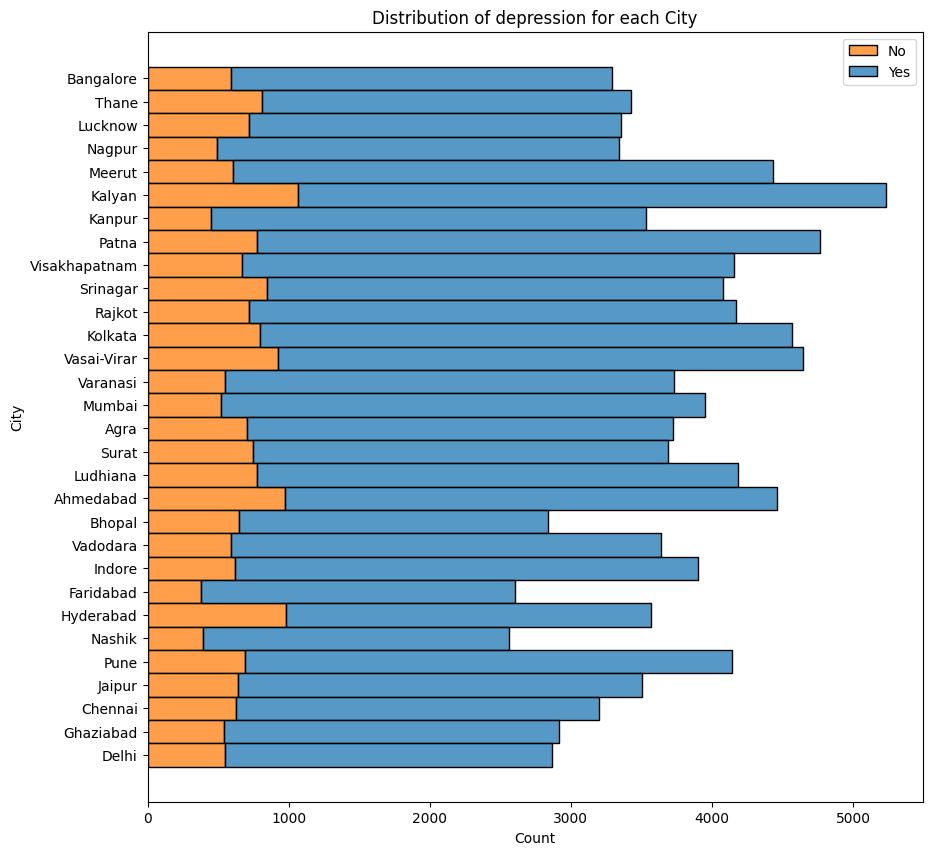

In [30]:
plt.figure(figsize=(10, 10))
sns.histplot(data_train, y="City", hue="Depression", multiple="stack")
plt.title("Distribution of depression for each City")
plt.legend(["No", "Yes"])
plt.show()

- Lets look at the percentage of total population of each city that is depressed according to the survey.
- Also we can look at the 4 metro cities of India - Delhi, Mumbai, Kolkata, and Chennai.


In [31]:
## Percentage of Depressed in each city
depression_percentage = data_train.groupby("City")["Depression"].mean() * 100
print(depression_percentage.sort_values(ascending=False))

City
Hyderabad        27.494395
Thane            23.599767
Bhopal           22.876278
Ahmedabad        21.801479
Lucknow          21.405180
Srinagar         20.794507
Kalyan           20.416746
Surat            20.206130
Vasai-Virar      19.853575
Chennai          19.575398
Delhi            19.024390
Agra             18.845638
Ludhiana         18.603539
Ghaziabad        18.587106
Jaipur           18.218161
Bangalore        17.922236
Kolkata          17.374179
Rajkot           17.305849
Pune             16.690821
Vadodara         16.300165
Patna            16.271755
Visakhapatnam    16.065416
Indore           15.956901
Nashik           15.390625
Nagpur           14.769323
Varanasi         14.737406
Faridabad        14.648212
Meerut           13.644565
Mumbai           13.129269
Kanpur           12.790040
Name: Depression, dtype: float64


In [32]:
depression_percentage_sorted = depression_percentage.sort_values(ascending=False)

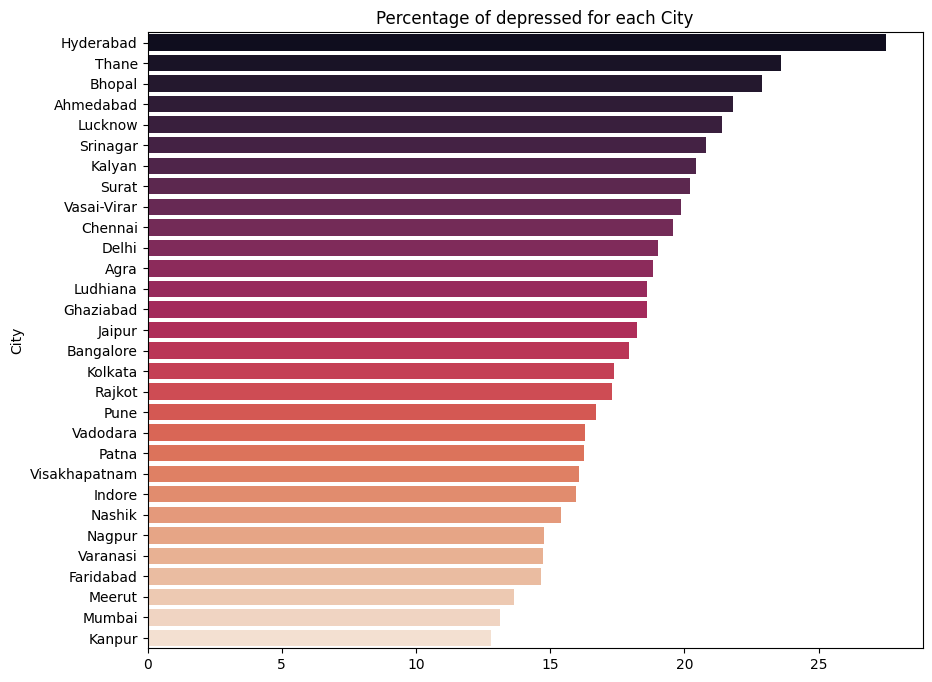

In [33]:
plt.figure(figsize=(10, 8))
sns.barplot(
    y=depression_percentage_sorted.index,
    x=depression_percentage_sorted.values,
    palette="rocket",
)
plt.title("Percentage of depressed for each City")
plt.show()

In [34]:
metro_cities = ["Chennai", "Delhi", "Kolkata", "Mumbai"]
percentage_metro_cities = [
    depression_percentage["Chennai"],
    depression_percentage["Delhi"],
    depression_percentage["Kolkata"],
    depression_percentage["Mumbai"],
]

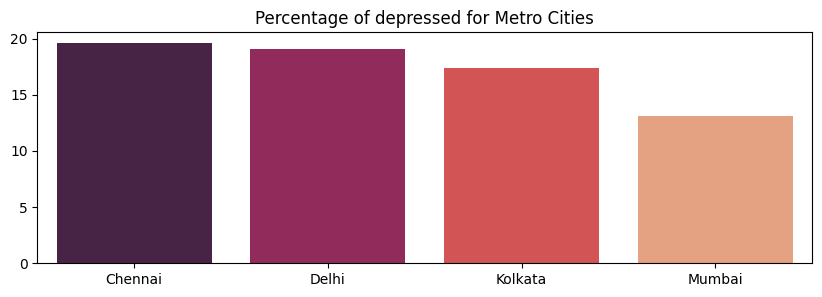

In [35]:
plt.figure(figsize=(10, 3))
sns.barplot(
    x=metro_cities,
    y=percentage_metro_cities,
    palette="rocket",
)
plt.title("Percentage of depressed for Metro Cities")
plt.show()

### Working Professional or Student

In [36]:
print(
    "Number of null values in the Working Professional or Student column =",
    data_train["Working Professional or Student"].isna().sum(),
)

Number of null values in the Working Professional or Student column = 0


In [37]:
data_train["Working Professional or Student"].value_counts()

Working Professional or Student
Working Professional    90149
Student                 22333
Name: count, dtype: int64

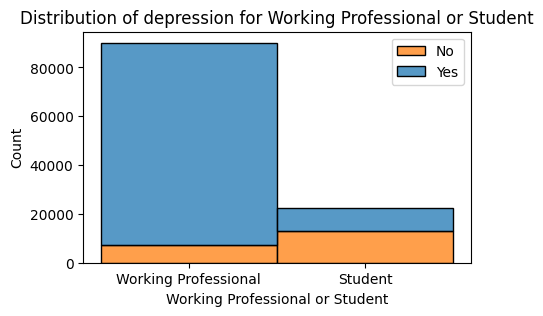

In [38]:
plt.figure(figsize=(5, 3))
sns.histplot(data_train, x="Working Professional or Student", hue="Depression", multiple="stack")
plt.title("Distribution of depression for Working Professional or Student")
plt.legend(["No", "Yes"])
plt.show()

In [39]:
## Percentage of Depressed for "Working Professional or Student"
depression_percentage = data_train.groupby("Working Professional or Student")["Depression"].mean() * 100
depression_percentage_sorted = depression_percentage.sort_values(ascending=False)
print(depression_percentage_sorted)

Working Professional or Student
Student                 58.420275
Working Professional     8.153169
Name: Depression, dtype: float64


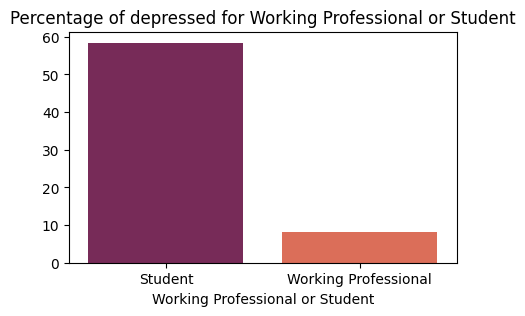

In [40]:
plt.figure(figsize=(5, 3))
sns.barplot(
    x=depression_percentage_sorted.index,
    y=depression_percentage_sorted.values,
    palette="rocket",
)
plt.title("Percentage of depressed for Working Professional or Student")
plt.show()

### Profession

In [41]:
print(
    "Number of null values in the Profession column =",
    data_train["Profession"].isna().sum(),
)

Number of null values in the Profession column = 29312


In [42]:
data_train["Profession"].value_counts()

Profession
Teacher                   19890
Content Writer             6246
Architect                  3529
Consultant                 3408
HR Manager                 3215
Pharmacist                 3121
Doctor                     2627
Business Analyst           2529
Entrepreneur               2372
Chemist                    2368
Educational Consultant     2287
Chef                       2279
Data Scientist             1905
Researcher                 1865
Lawyer                     1796
Customer Support           1651
Marketing Manager          1555
Pilot                      1544
Travel Consultant          1474
Sales Executive            1405
Plumber                    1392
Manager                    1391
Judge                      1368
Electrician                1237
Financial Analyst          1217
Software Engineer          1198
Civil Engineer             1177
UX/UI Designer             1167
Digital Marketer           1087
Accountant                 1072
Finanancial Analyst        10

- Replace "Finanancial Analyst" with "Financial Analyst"


In [43]:
data_train.loc[data_train["Profession"] == "Finanancial Analyst", "Profession"] = (
    "Financial Analyst"
)

In [44]:
data_train["Profession"].value_counts()

Profession
Teacher                   19890
Content Writer             6246
Architect                  3529
Consultant                 3408
HR Manager                 3215
Pharmacist                 3121
Doctor                     2627
Business Analyst           2529
Entrepreneur               2372
Chemist                    2368
Educational Consultant     2287
Chef                       2279
Financial Analyst          2248
Data Scientist             1905
Researcher                 1865
Lawyer                     1796
Customer Support           1651
Marketing Manager          1555
Pilot                      1544
Travel Consultant          1474
Sales Executive            1405
Plumber                    1392
Manager                    1391
Judge                      1368
Electrician                1237
Software Engineer          1198
Civil Engineer             1177
UX/UI Designer             1167
Digital Marketer           1087
Accountant                 1072
Mechanical Engineer         9

In [45]:
data_train[data_train["Profession"] == "Academic"]

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
92626,Male,52.0,Meerut,Working Professional,Academic,NaN,2.0,NaN,NaN,1.0,7-8 hours,Moderate,PhD,Yes,1.0,1.0,Yes,0
23789,Male,50.0,Kanpur,Working Professional,Academic,NaN,4.0,NaN,NaN,2.0,More than 8 hours,Healthy,M.Com,No,6.0,1.0,Yes,0
36398,Male,52.0,Vasai-Virar,Working Professional,Academic,NaN,2.0,NaN,NaN,1.0,7-8 hours,Unhealthy,MCA,Yes,5.0,1.0,Yes,0
121476,Female,60.0,Thane,Working Professional,Academic,NaN,1.0,NaN,NaN,3.0,7-8 hours,Unhealthy,B.Ed,No,9.0,3.0,Yes,0


Can replace "Academic" to "Teacher"

In [46]:
data_train.loc[data_train["Profession"] == "Academic", "Profession"] = (
    "Teacher"
)

In [47]:
data_train[data_train["Profession"] == "Student"]

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
20296,Male,32.0,Agra,Student,Student,2.0,NaN,8.13,5.0,NaN,More than 8 hours,Unhealthy,B.Ed,No,11.0,1.0,No,0
11509,Female,22.0,Thane,Working Professional,Student,NaN,3.0,NaN,NaN,2.0,7-8 hours,Moderate,B.Com,Yes,5.0,2.0,No,0
88617,Male,29.0,Srinagar,Working Professional,Student,NaN,4.0,NaN,NaN,2.0,5-6 hours,Moderate,BE,No,10.0,1.0,Yes,0
20049,Female,24.0,Kolkata,Student,Student,1.0,NaN,7.32,4.0,NaN,More than 8 hours,Moderate,MA,Yes,8.0,3.0,Yes,0


Can remove "Working Professional" "Student".

In [48]:
data_train.drop(index=11509, inplace=True)

In [49]:
data_train.drop(index=88617, inplace=True)

In [50]:
data_train[data_train["Profession"] == "Student"]

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
20296,Male,32.0,Agra,Student,Student,2.0,NaN,8.13,5.0,NaN,More than 8 hours,Unhealthy,B.Ed,No,11.0,1.0,No,0
20049,Female,24.0,Kolkata,Student,Student,1.0,NaN,7.32,4.0,NaN,More than 8 hours,Moderate,MA,Yes,8.0,3.0,Yes,0


In [51]:
data_train[data_train["Profession"] == "Yogesh"]

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
12526,Male,34.0,Indore,Working Professional,Yogesh,NaN,4.0,NaN,NaN,1.0,Less than 5 hours,Unhealthy,M.Com,Yes,10.0,3.0,Yes,1
44829,Male,34.0,Varanasi,Working Professional,Yogesh,NaN,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,M.Ed,No,4.0,2.0,No,0
28927,Male,33.0,Agra,Working Professional,Yogesh,NaN,5.0,NaN,NaN,1.0,5-6 hours,Unhealthy,B.Ed,Yes,0.0,4.0,Yes,1


Since 2 out 3 of these have depression, we should keep them and rename the "Yogesh" to "Others".

In [52]:
data_train.loc[data_train["Profession"] == "Yogesh", "Profession"] = (
    "Other"
)

In [53]:
data_train[data_train["Profession"] == "PhD"]

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
131669,Female,51.0,Kanpur,Working Professional,PhD,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,PhD,Yes,9.0,2.0,Yes,0
123669,Male,45.0,Pune,Working Professional,PhD,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,BCA,Yes,2.0,1.0,Yes,0


For now lets visualize the common categories

In [54]:
profession_counts = data_train["Profession"].value_counts()
profession_counts[profession_counts <= 4]

Profession
Other                3
Unemployed           3
PhD                  2
Student              2
Profession           2
BCA                  2
BE                   1
Dev                  1
MBA                  1
Yuvraj               1
Visakhapatnam        1
Medical Doctor       1
Analyst              1
B.Ed                 1
B.Com                1
LLM                  1
Unveil               1
Moderate             1
Family Consultant    1
BBA                  1
Nagpur               1
MBBS                 1
City Manager         1
Name: count, dtype: int64

In [55]:
data_train = data_train[
    data_train["Profession"].isin(profession_counts[profession_counts > 3].index)
]

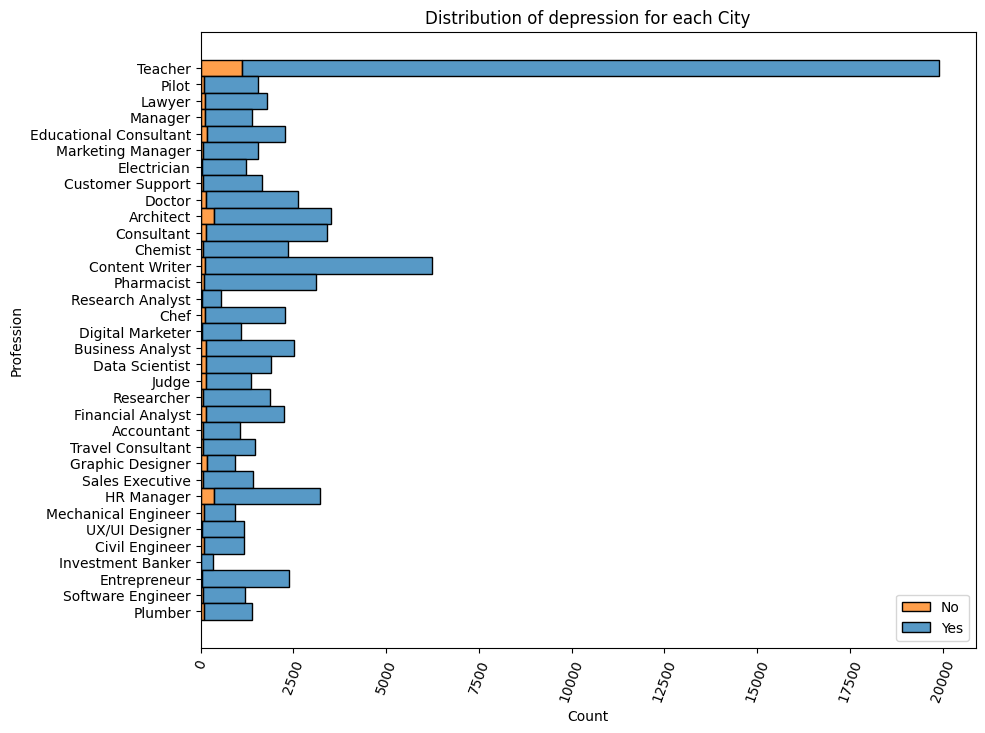

In [56]:
plt.figure(figsize=(10, 8))
sns.histplot(data_train, y="Profession", hue="Depression", multiple="stack")
plt.title("Distribution of depression for each City")
plt.legend(["No", "Yes"])
plt.xticks(rotation=70)
plt.show()

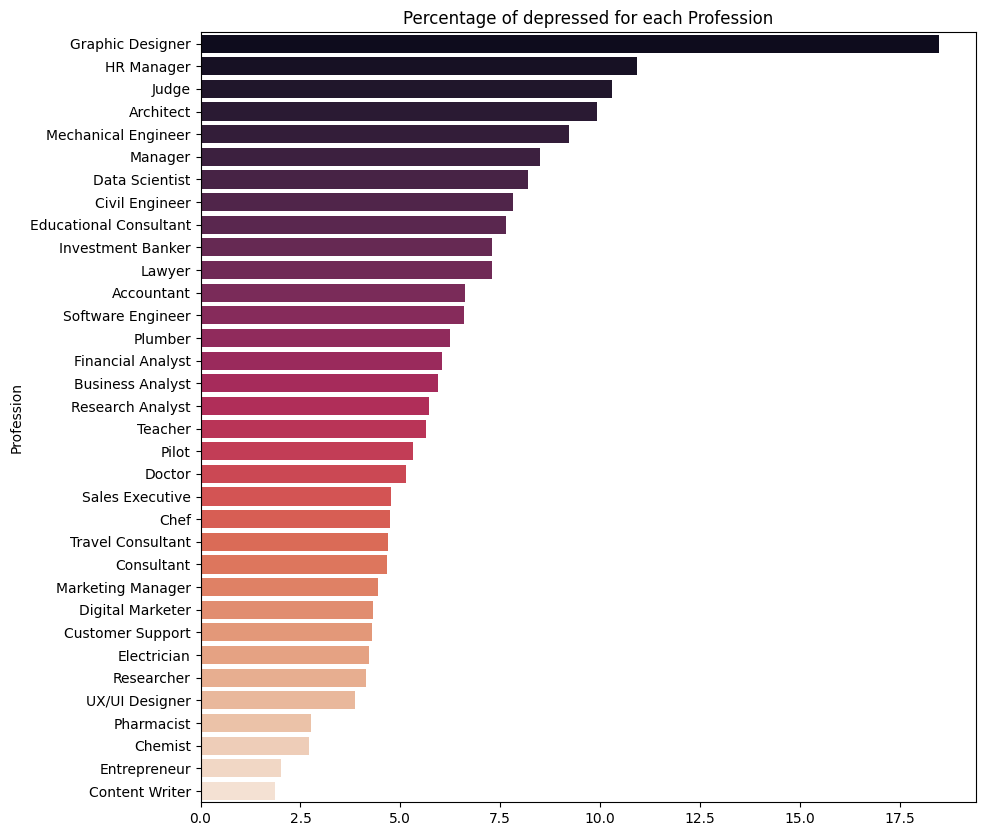

In [57]:
depression_percentage = data_train.groupby("Profession")["Depression"].mean() * 100
depression_percentage_sorted = depression_percentage.sort_values(ascending=False)
plt.figure(figsize=(10, 10))
sns.barplot(
    y=depression_percentage_sorted.index,
    x=depression_percentage_sorted.values,
    palette="rocket",
)
plt.title("Percentage of depressed for each Profession")
plt.show()